In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
!pip install seaborn


In [5]:
# Read the data from the provided link

link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

In [6]:
# Understand the data by reading first 5 and last 5 records from the dataset

data.head() # first 5

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail() # last 5

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# Check the shape of data

data.shape

(25, 2)

In [9]:
# Check if there is any null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# Display the summary of the dataset

data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

[Text(0.5, 1.0, 'Score/Hours')]

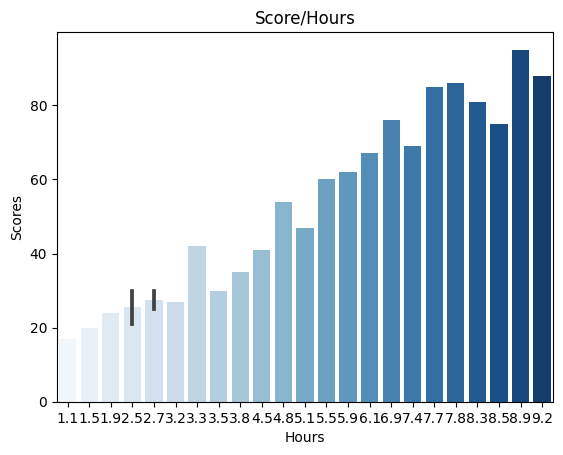

In [11]:
# Group the data using score and hours, then Using bar chart ,plot score vs hours. 
# The next phase is to enter distribution scores and plot them according to the requirement, 
# here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

import seaborn as sns

sns.barplot(data, x = "Hours", y = "Scores", palette = "Blues").set(title = "Score/Hours")

[Text(0.5, 1.0, 'Score/Hours')]

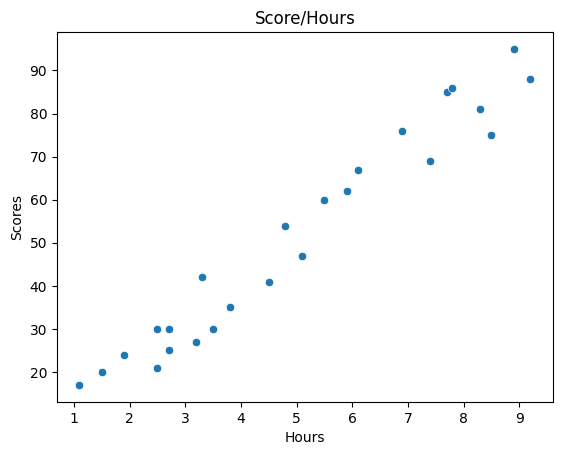

In [12]:
# Visualize distribution of data using scatter plot

sns.scatterplot(data, x = "Hours", y = "Scores").set(title = "Score/Hours")

In [13]:
# Prepare the data by splitting it into Training and Test set

from sklearn.model_selection import train_test_split

df = data.copy()

X = df[['Hours']] # independent feature
y = df[['Scores']] # dependent feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # regressor is the object of Linear regression class 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


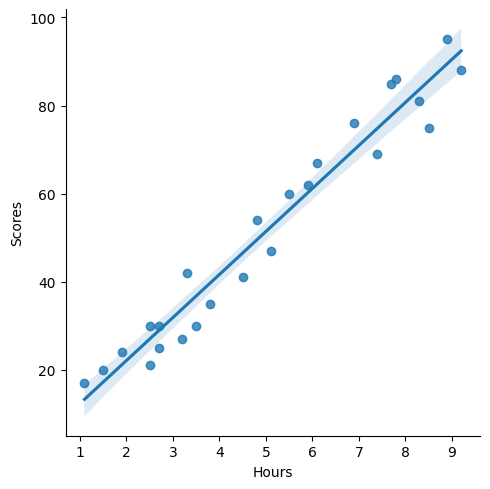

In [15]:
# Plot the regression line

sns.lmplot(data, x = "Hours", y = "Scores")

In [28]:
# Plot the training and test data . Predict the score and compare predicted and actual score

y_pred=regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [25]:
# Predict accuracy using r2square
from sklearn.metrics import r2_score

r2_score(y_test, y_pred, force_finite=False)

0.9568211104435257

In [19]:
# Predict the percentage grade of a student if study hours are 9.25

Study_hours = 9.25
percentage_pred=regressor.predict([[Study_hours]])
print(percentage_pred)

[[92.91505723]]


d:\Anaconda3-2022.05-Windows-x86_64\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4.42
Mean squared error: 22.97
Root mean squared error: 4.79


C:\Users\hugot\AppData\Local\Temp\ipykernel_16856\233443078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

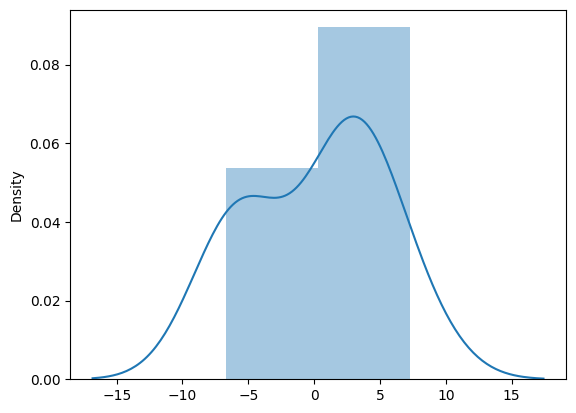

In [26]:
# Import seaborn and plot the distribution as well
sns.distplot(y_test-y_pred)

In [81]:
# Print actual vs predicted percentage score

In [82]:
# Apply ridge and grid search to improvise your model